# Optimisation – Project 1

## Part 3.2
Median problem with weighted Euclidean distance

\begin{equation}
\min_{x \in \mathbb{R}} \sum_{i \in \mathcal{M}} v^i d_2(a^i, x)
\end{equation}

where $\mathcal{M} = \{1, \dots, m\}$ and $0 ≤ v^i \in \mathbb{R}, \; \forall i \in \mathcal{M}$.

We will here look into the Weiszfeld algorithm for solving the problem above.

## See overleaf for some of the solutions

## 4

In [404]:
import autograd.numpy as np
from autograd import grad
import time
from matplotlib import pyplot as plt
from tabulate import tabulate
import random

## A solution for implementing an apropriate stopping criterion

In [583]:
def ourWeiszfeld(A, v, epsilon = 10**(-6)):
    """
    A = [a^1,..., a^i,..., a^m]^T   where   a^i = [a_1^i, a_2^i]
    Hence, A is a m times 2 matrix
    v = [v^1,..., v^i,..., v^m]^T   where   0<v^i \in \mathbb{R}, \forall i \in \mathcal{M} 
    epsilon > 0
    """
    #############################
    # Functions for stopping ciretion
    #############################
    
    def sigma(x):
        dist = np.linalg.norm(x[:, None] - A, axis = 0)
        return np.max(dist)
    
    def f_d2(x):
        return (np.sum(np.multiply(v,np.linalg.norm(x[:, None] - A, axis = 0))))

    gradient = grad(f_d2)
    
    def stoping_criterion(x):
        norm_grad = np.linalg.norm(gradient(x))
        sig = sigma(x)
        return ((norm_grad * sig)/(f_d2(x) - norm_grad * sig))
    
    #############################
    # Initialise values
    #############################
    m = A.shape[1]
    
    x = np.mean(A, axis = 1)
    k = 0
    stop_crit = stoping_criterion(x)
    convergence = [[stop_crit, k]]
    
    #############################
    # Test if some positions are optimal
    #############################
    
    # We define a test function to make the code leaner
    def testK(k):
        sum1 = 0
        sum2 = 0
        for i in range(m): 
            if i != k:
                dist = np.linalg.norm((A[:, k] - A[:, i])) # d_2(*,*) euclidean distance
                sum1 += v[i]* (A[:, k].item(0) - A[:, i].item(0))/(dist)
                sum2 += v[i]* (A[:, k].item(1) - A[:, i].item(1))/(dist)
                
        result = np.sqrt(sum1**2 + sum2**2)
        return (result <= v[k])

    
    for k in range(m): 
        # theorem 1 test if the theorem is fulfilled for a "k"
        if testK(k): # do we need to pass the k? should rather not?
            x_star = A[:, k] # could just return A[:, k], but this is clearer
            return [x_star, convergence]
    
    #print(f"Test is conducted")
    
    #############################
    # Main iteration scheme
    #############################
    
    while stop_crit > epsilon: # We have k = 50 here just to make the while loop stop
        k += 1
        # We print the value of the stopping criterion to see what happens
        
        for j in range(len(x)):
            enum = 0
            deno = 0
            
            for i in range(m):
                dist = np.linalg.norm((np.squeeze(np.array(A[:, i])) - x))
                enum += v[i]*A[:, i].item(j)/dist
                deno += v[i]/dist

            x[j] = enum/deno
            
        stop_crit = stoping_criterion(x)
#        print(stop_crit)
        convergence.append([stop_crit, k]) 
        
    return [x, convergence]

## An example, showing that the implemenetation is correct


In [586]:
A_test = np.array([[0.,4.,8.,6.,10.],[0.,0.,10.,6.,4.]])

v_test = np.array([1.,1.,1.,1.,1.])

ourWeiszfeld(A_test, v_test)[0]


array([6.13064863, 5.33042671])

In [566]:
weis[0], steep[0]

(array([32.25553463, 52.47714008]), array([27.21545532, 65.20390364]))

In [550]:
m = 5
A = np.random.random(size = (2, m))
# Values in the interval 0 to 100
A = 100 * A

# Initialise x
x_init = np.mean(A, axis = 1)

# Make normalised weights
v = np.random.rand(m)
v = v/np.sum(v)

In [551]:
ourWeiszfeld(A, v, x_init)[0], steepestDescent(x_init, f_d2), A

Test is conducted
Test is conducted


(array([42.02062568, 60.97961466]),
 [array([42.02062568, 60.97961466]), [[6.856839681627342e-07, 0]]],
 array([[79.48558523, 77.57221793, 43.07398556, 68.2777084 , 15.77971479],
        [98.33820311, 50.07874203, 16.85745608, 29.9246918 , 63.46185591]]))

## Gradient descent algorithm

In [536]:
def steepestDescent(x_init, obj_func, max_iter = 100000, threshold = 10**(-6)):
    
    # We create the gradient function for the objective function using autograd
    gradient = grad(obj_func)
    
    #############################
    # Functions for stopping ciretion
    #############################
    
    def sigma(x):
        dist = np.linalg.norm(x[:, None] - A, axis = 0)
        return np.max(dist)

    def stoping_criterion_steepest(x):
        norm_grad = np.linalg.norm(gradient(x))
        sig = sigma(x)
        return ((norm_grad * sig)/(obj_func(x) - norm_grad * sig))
    
    
    
    # Here we initialize
    i = 0
    x = np.array(x_init) 
    rho = 0.4
    c = 0.6
#    diff = np.full((len(x), 1), 100) # initialize some value
    
    stop_crit = stoping_criterion(x)
    convergence = [[stop_crit, i]]
    
    #############################
    # Test if some positions are optimal
    #############################
    
    # We define a test function to make the code leaner
    def testK(k):
        sum1 = 0
        sum2 = 0
        for i in range(m): 
            if i != k:
                dist = np.linalg.norm((A[:, k] - A[:, i])) # d_2(*,*) euclidean distance
                sum1 += v[i]* (A[:, k].item(0) - A[:, i].item(0))/(dist)
                sum2 += v[i]* (A[:, k].item(1) - A[:, i].item(1))/(dist)
                
        result = np.sqrt(sum1**2 + sum2**2)
        return (result <= v[k])

    
    for k in range(m): 
        # theorem 1 test if the theorem is fulfilled for a "k"
        if testK(k): # do we need to pass the k? should rather not?
            x_star = A[:, k] # could just return A[:, k], but this is clearer
            return [x_star, convergence]
    
    print(f"Test is conducted")
    
    
    while stop_crit > threshold and i < max_iter: 
        
        # To count the number of iterations
        i += 1
        a = 1
        grad_k = gradient(x)
        
        # I make a pk for convenience 
        pk = -grad_k
        
        # The following is backtracking
        while obj_func(x + a*pk) > obj_func(x) + a*c*np.transpose(grad_k) @ pk: # i.e. repeat until not true
            a = rho*a
        
        # The new x is stored
        x = x + a*pk
        
        stop_crit = stoping_criterion(x)
#        print(stop_crit)
        convergence.append([stop_crit, i]) 
        
    return [x, convergence]

## Stopping criterion

In [511]:
def sigma(x):
    dist = np.linalg.norm(x[:, None] - A, axis = 0)
    return np.max(dist)
    
def f_d2(x):
    return (np.sum(np.multiply(v,np.linalg.norm(x[:, None] - A, axis = 0))))

gradient = grad(f_d2)

def stoping_criterion(x):
    norm_grad = np.linalg.norm(gradient(x))
    sig = sigma(x)
    return ((norm_grad * sig)/(f_d2(x) - norm_grad * sig))


## Finding initial value for the algorithms

In [224]:
def steepDesc(x_init, obj_func, max_iter = 1000, threshold = 10**(-7)):
    
    # We create the gradient function for the objective function using autograd
    gradient = grad(obj_func)
    
    # Here we initialize
    i = 0
    x = np.array(x_init) 
    rho = 0.4
    c = 0.6
    diff = np.full((len(x), 1), 100) # initialize some value

    while i < max_iter and diff.any() > threshold:
        
        # To count the number of iterations
        i += 1
        a = 1
        grad_k = gradient(x)
        
        # I make a pk for convenience 
        pk = -grad_k
        
        # The following is backtracking
        while obj_func(x + a*pk) > obj_func(x) + a*c*np.transpose(grad_k) @ pk: # i.e. repeat until not true
            a = rho*a
        
        # The new x is stored
        x = x + a*pk
        
        diff = np.abs(a*pk)
        
    return x

## Initialise values

In [552]:
m = 10
A = np.random.random(size = (2, m))
# Values in the interval 0 to 100
A = 100 * A

# Initialise x
x_init = np.mean(A, axis = 1)

# Make normalised weights
v = np.random.rand(m)
v = v/np.sum(v)

In [236]:
#############################
# Finding a starting point
#############################

# choose a starting point x = [x_1, x_2]^T, can be found solving the median problem with ||\cdot||_2^2
def f_d2_squared_norm(x):
    return (np.sum(np.multiply(v,np.linalg.norm(x[:, None] - A, axis = 0)**2)))

# Solving the problem with squared Euclidean distance
#x_init = steepDesc(x_init, f_d2_squared_norm, threshold = 0.001)

In [507]:
stoping_criterion(x_init), x_init

(0.30043926269071813, array([38.09820442, 64.02038153]))

In [553]:
start_steepest = time.time()
steepest_descent_result = steepestDescent(x_init, f_d2)
end_steepest = time.time()

Test is conducted


In [554]:
start_weiszfeld = time.time()
weiszfeld_result = ourWeiszfeld(A, v, x_init)
end_weiszfeld = time.time()

Test is conducted


In [555]:
steepest_descent_result[0], weiszfeld_result[0], A

(array([27.21545532, 65.20390364]),
 array([27.21545407, 65.20390775]),
 array([[43.73016222, 35.86012418, 11.77700988, 20.62231542, 23.18232207,
         19.22094769, 51.41080649, 32.35480238, 25.20857187, 59.18828411],
        [24.43688279, 99.61377532, 36.68545425, 93.61449558, 71.78681669,
         44.67433638,  5.9044216 ,  5.23262612, 78.97890889, 63.84368321]]))

## Plotting the convergence as a function of iterations

### Steepest descent

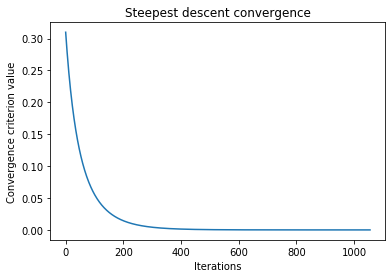

In [250]:
xaxis = np.array(steepest_descent_result[1])[:, 1]
steep_conv = np.array(steepest_descent_result[1])[:, 0]

plt.plot(xaxis, steep_conv)
plt.title('Steepest descent convergence')
plt.ylabel('Convergence criterion value')
plt.xlabel('Iterations')
plt.show()

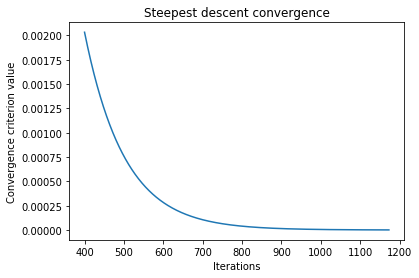

In [475]:
xaxis = np.array(steepest_descent_result[1])[:, 1][400:]
steep_conv = np.array(steepest_descent_result[1])[:, 0][400:]

plt.plot(xaxis, steep_conv)
plt.title('Steepest descent convergence')
plt.ylabel('Convergence criterion value')
plt.xlabel('Iterations')
plt.show()

### Weiszfeld

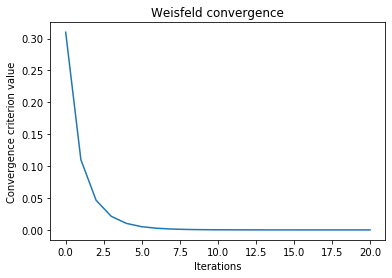

In [251]:
xaxis = np.array(weiszfeld_result[1])[:, 1]
weis_conv = np.array(weiszfeld_result[1])[:, 0]

plt.plot(xaxis, weis_conv)
plt.title('Weisfeld convergence')
plt.ylabel('Convergence criterion value')
plt.xlabel('Iterations')
plt.show()

In [421]:
time_steep = end_steepest - start_steepest
time_weiszfeld = end_weiszfeld - start_weiszfeld

time_steep, time_weiszfeld

(0.001033782958984375, 0.0029859542846679688)

## Here we will observe the convergence fo some other $\epsilon$

In [480]:
m = 10
A = np.random.random(size = (2, m))
# Values in the interval 0 to 100
A = 100 * A

# Initialise x
x_init = np.mean(A, axis = 1)

# Make normalised weights
v = np.random.rand(m)
v = v/np.sum(v)

In [467]:
start_steepest2 = time.time()
steepest_descent_result2 = steepestDescent(x_init, f_d2, threshold = 10**(-10))
end_steepest2 = time.time()

Test is conducted


In [481]:
start_weiszfeld2 = time.time()
weiszfeld_result2 = ourWeiszfeld(A, v, x_init, epsilon = 10**(-10))
end_weiszfeld2 = time.time()

Test is conducted


### Now we plot the results again

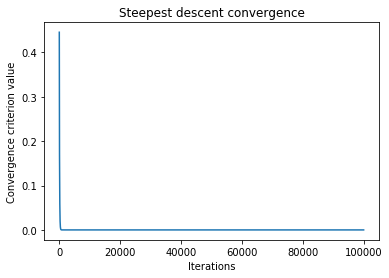

In [470]:
xaxis = np.array(steepest_descent_result2[1])[:, 1]
steep_conv2 = np.array(steepest_descent_result2[1])[:, 0]

plt.plot(xaxis, steep_conv2)
plt.title('Steepest descent convergence')
plt.ylabel('Convergence criterion value')
plt.xlabel('Iterations')
plt.show()

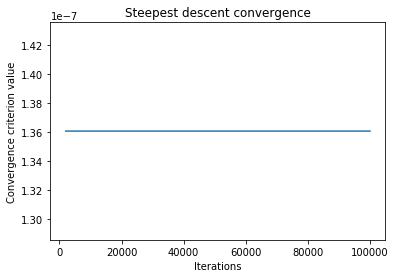

In [472]:
xaxis = np.array(steepest_descent_result2[1])[:, 1][2000:]
steep_conv2 = np.array(steepest_descent_result2[1])[:, 0][2000:]

plt.plot(xaxis, steep_conv2)
plt.title('Steepest descent convergence')
plt.ylabel('Convergence criterion value')
plt.xlabel('Iterations')
plt.show()

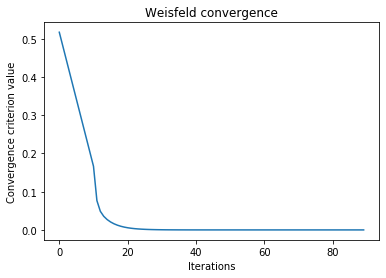

In [482]:
xaxis = np.array(weiszfeld_result2[1])[:, 1]
weis_conv2 = np.array(weiszfeld_result2[1])[:, 0]

plt.plot(xaxis, weis_conv2)
plt.title('Weisfeld convergence')
plt.ylabel('Convergence criterion value')
plt.xlabel('Iterations')
plt.show()

### Below we measure performance for different values of $m$, with $\epsilon = 10^{-6}$

In [573]:
def performanceMeasure(m):
    # Vectores to store performance
    iter_weis = []
    time_weis = []
    
    iter_steep = []
    time_steep = []
    
    for i in range(100):
        # To see the progress
        print(i)
        
        # Here we set a seed that changes for each iteration and for each time we run the code
        random.seed(time.time() * i + random.random()*10000)
        
        ############### 
        # Initialise values
        ###############
        
        A = np.random.random(size = (2, m))
        # Values in the interval 0 to 100
        A = 100 * A

        # Initialise x
        x_init = np.mean(A, axis = 1)

        # Make normalised weights
        v = np.random.rand(m)
        v = v/np.sum(v)
        
        ############### 
        # Run algorithms and measure time taken for convergence
        ###############
        
        # Steepest descent
        start_steepest = time.time()
        steepest_descent_result = steepestDescent(x_init, f_d2)
        end_steepest = time.time()
        
        # Weiszfeld
        start_weiszfeld = time.time()
        weiszfeld_result = ourWeiszfeld(A, v)
        end_weiszfeld = time.time()

        ############### 
        # Calculate performance measures
        ###############
        
        weis_iter = np.array(weiszfeld_result[1])
        weis_iter = weis_iter[:, 1]
        weis_iter = weis_iter[len(weiszfeld_result[1]) - 1]
        
        iter_weis.append(weis_iter)
        time_weis.append(end_weiszfeld - start_weiszfeld)
        
        iter_steep.append(np.array(steepest_descent_result[1])[:, 1][len(steepest_descent_result[1]) - 1])
        time_steep.append(end_steepest - start_steepest)
        
    return(iter_weis, time_weis, iter_steep, time_steep)

## We measure the performances for $m = 5$

In [459]:
performance_measures_5 = performanceMeasure(5)

0
Test is conducted
Test is conducted
1
Test is conducted
2
Test is conducted
3
Test is conducted
Test is conducted
4
Test is conducted
5
Test is conducted
6
Test is conducted
7
Test is conducted
Test is conducted
8
Test is conducted
9
Test is conducted
Test is conducted
10
Test is conducted
Test is conducted
11
Test is conducted
Test is conducted
12
Test is conducted
Test is conducted
13
Test is conducted
14
Test is conducted
Test is conducted
15
Test is conducted
Test is conducted
16
Test is conducted
Test is conducted
17
Test is conducted
Test is conducted
18
Test is conducted
Test is conducted
19
Test is conducted
20
Test is conducted
Test is conducted
21
Test is conducted
22
Test is conducted
Test is conducted
23
Test is conducted
24
Test is conducted
Test is conducted
25
Test is conducted
Test is conducted
26
Test is conducted
Test is conducted
27
Test is conducted
28
Test is conducted
29
Test is conducted
Test is conducted
30
Test is conducted
Test is conducted
31
Test is conduc

In [460]:
mean_iter_weis_5 = np.mean(np.array(performance_measures_5[0]))
mean_time_weis_5 = np.mean(np.array(performance_measures_5[1]))

var_iter_weis_5 = np.var(np.array(performance_measures_5[0]))
var_time_weis_5 = np.var(np.array(performance_measures_5[1]))

mean_iter_steep_5 = np.mean(np.array(performance_measures_5[2]))
mean_time_steep_5 = np.mean(np.array(performance_measures_5[3]))

var_iter_steep_5 = np.var(np.array(performance_measures_5[2]))
var_time_steep_5 = np.var(np.array(performance_measures_5[3]))

In [461]:

algo = ["Time", "", "Iterations", ""]
meas = ["Mean", "Var", "Mean", "Var"]

weis_measures_5 = [mean_time_weis_5, var_time_weis_5, mean_iter_weis_5, var_iter_weis_5]
steep_measures_5 = [mean_time_steep_5, var_time_steep_5, mean_iter_steep_5, var_iter_steep_5]

results_5 = (algo, meas, weis_measures_5, steep_measures_5)

# Transpose the results
numpy_array = np.array(results_5)
transpose = numpy_array.T
results_5 = transpose.tolist()

print(tabulate(results_5, headers=["Weiszfeld", "Steepest descent"], tablefmt = "simple"))


                      Weiszfeld    Steepest descent
----------  ----  -------------  ------------------
Time        Mean      0.0397934           0.935247
            Var       0.0278188           0.0217527
Iterations  Mean     65.35             1154.18
            Var   79366.2             23497.1


## We measure the performances for $m = 10$

In [574]:
performance_measures_10 = performanceMeasure(10)

mean_iter_weis_10 = np.mean(np.array(performance_measures_10[0]))
mean_time_weis_10 = np.mean(np.array(performance_measures_10[1]))

var_iter_weis_10 = np.var(np.array(performance_measures_10[0]))
var_time_weis_10 = np.var(np.array(performance_measures_10[1]))

mean_iter_steep_10 = np.mean(np.array(performance_measures_10[2]))
mean_time_steep_10 = np.mean(np.array(performance_measures_10[3]))

var_iter_steep_10 = np.var(np.array(performance_measures_10[2]))
var_time_steep_10 = np.var(np.array(performance_measures_10[3]))

0
Test is conducted
Test is conducted
1
Test is conducted
Test is conducted
2
Test is conducted
Test is conducted
3
Test is conducted
Test is conducted
4
Test is conducted
5
Test is conducted
Test is conducted
6
Test is conducted
Test is conducted
7
Test is conducted
Test is conducted
8
Test is conducted
Test is conducted
9
Test is conducted
Test is conducted
10
Test is conducted
Test is conducted
11
Test is conducted
Test is conducted
12
Test is conducted
Test is conducted
13
Test is conducted
Test is conducted
14
Test is conducted
Test is conducted
15
Test is conducted
16
Test is conducted
Test is conducted
17
Test is conducted
Test is conducted
18
Test is conducted
Test is conducted
19
Test is conducted
Test is conducted
20
Test is conducted
Test is conducted
21
Test is conducted
Test is conducted
22
Test is conducted
23
Test is conducted
Test is conducted
24
Test is conducted
Test is conducted
25
Test is conducted
26
Test is conducted
27
Test is conducted
Test is conducted
28
Test 

In [575]:

algo = ["Time", "", "Iterations", ""]
meas = ["Mean", "Var", "Mean", "Var"]

weis_measures_10 = [mean_time_weis_10, var_time_weis_10, mean_iter_weis_10, var_iter_weis_10]
steep_measures_10 = [mean_time_steep_10, var_time_steep_10, mean_iter_steep_10, var_iter_steep_10]

results_10 = (algo, meas, weis_measures_10, steep_measures_10)

# Transpose the results
numpy_array = np.array(results_10)
transpose = numpy_array.T
results_10 = transpose.tolist()

print(tabulate(results_10, headers=["Weiszfeld", "Steepest descent"], tablefmt = "simple"))

                      Weiszfeld    Steepest descent
----------  ----  -------------  ------------------
Time        Mean     0.0410592             0.988823
            Var      0.00140061            0.494118
Iterations  Mean    42.97                991.32
            Var   1471.69             328215


## We measure the performances for $m = 20$

In [451]:
performance_measures_20 = performanceMeasure(20)

mean_iter_weis_20 = np.mean(np.array(performance_measures_20[0]))
mean_time_weis_20 = np.mean(np.array(performance_measures_20[1]))

var_iter_weis_20 = np.var(np.array(performance_measures_20[0]))
var_time_weis_20 = np.var(np.array(performance_measures_20[1]))

mean_iter_steep_20 = np.mean(np.array(performance_measures_20[2]))
mean_time_steep_20 = np.mean(np.array(performance_measures_20[3]))

var_iter_steep_20 = np.var(np.array(performance_measures_20[2]))
var_time_steep_20 = np.var(np.array(performance_measures_20[3]))

0
Test is conducted
Test is conducted
1
Test is conducted
Test is conducted
2
Test is conducted
Test is conducted
3
Test is conducted
Test is conducted
4
Test is conducted
5
Test is conducted
Test is conducted
6
Test is conducted
Test is conducted
7
Test is conducted
Test is conducted
8
Test is conducted
Test is conducted
9
Test is conducted
Test is conducted
10
Test is conducted
Test is conducted
11
Test is conducted
Test is conducted
12
Test is conducted
Test is conducted
13
Test is conducted
14
Test is conducted
Test is conducted
15
Test is conducted
Test is conducted
16
Test is conducted
Test is conducted
17
Test is conducted
18
Test is conducted
Test is conducted
19
Test is conducted
20
Test is conducted
Test is conducted
21
Test is conducted
Test is conducted
22
Test is conducted
Test is conducted
23
Test is conducted
Test is conducted
24
Test is conducted
Test is conducted
25
Test is conducted
Test is conducted
26
Test is conducted
Test is conducted
27
Test is conducted
Test is 

In [452]:

algo = ["Time", "", "Iterations", ""]
meas = ["Mean", "Var", "Mean", "Var"]

weis_measures_20 = [mean_time_weis_20, var_time_weis_20, mean_iter_weis_20, var_iter_weis_20]
steep_measures_20 = [mean_time_steep_20, var_time_steep_20, mean_iter_steep_20, var_iter_steep_20]

results_20 = (algo, meas, weis_measures_20, steep_measures_20)

# Transpose the results
numpy_array = np.array(results_20)
transpose = numpy_array.T
results_20 = transpose.tolist()

print(tabulate(results_20, headers=["Weiszfeld", "Steepest descent"], tablefmt = "simple"))

                     Weiszfeld    Steepest descent
----------  ----  ------------  ------------------
Time        Mean     0.0446668           0.924519
            Var      0.0018262           0.0189662
Iterations  Mean    44.69             1089.48
            Var   1086.37            11703.3


## We measure the performances for $m = 50$

In [462]:
performance_measures_50 = performanceMeasure(50)

mean_iter_weis_50 = np.mean(np.array(performance_measures_50[0]))
mean_time_weis_50 = np.mean(np.array(performance_measures_50[1]))

var_iter_weis_50 = np.var(np.array(performance_measures_50[0]))
var_time_weis_50 = np.var(np.array(performance_measures_50[1]))

mean_iter_steep_50 = np.mean(np.array(performance_measures_50[2]))
mean_time_steep_50 = np.mean(np.array(performance_measures_50[3]))

var_iter_steep_50 = np.var(np.array(performance_measures_50[2]))
var_time_steep_50 = np.var(np.array(performance_measures_50[3]))

0
Test is conducted
Test is conducted
1
Test is conducted
Test is conducted
2
Test is conducted
Test is conducted
3
Test is conducted
Test is conducted
4
Test is conducted
Test is conducted
5
Test is conducted
Test is conducted
6
Test is conducted
Test is conducted
7
Test is conducted
Test is conducted
8
Test is conducted
Test is conducted
9
Test is conducted
Test is conducted
10
Test is conducted
Test is conducted
11
Test is conducted
Test is conducted
12
Test is conducted
Test is conducted
13
Test is conducted
Test is conducted
14
Test is conducted
Test is conducted
15
Test is conducted
Test is conducted
16
Test is conducted
Test is conducted
17
Test is conducted
Test is conducted
18
Test is conducted
19
Test is conducted
Test is conducted
20
Test is conducted
Test is conducted
21
Test is conducted
Test is conducted
22
Test is conducted
Test is conducted
23
Test is conducted
Test is conducted
24
Test is conducted
Test is conducted
25
Test is conducted
Test is conducted
26
Test is con

In [463]:

algo = ["Time", "", "Iterations", ""]
meas = ["Mean", "Var", "Mean", "Var"]

weis_measures_50 = [mean_time_weis_50, var_time_weis_50, mean_iter_weis_50, var_iter_weis_50]
steep_measures_50 = [mean_time_steep_50, var_time_steep_50, mean_iter_steep_50, var_iter_steep_50]

results_50 = (algo, meas, weis_measures_50, steep_measures_50)

# Transpose the results
numpy_array = np.array(results_50)
transpose = numpy_array.T
results_50 = transpose.tolist()

print(tabulate(results_50, headers=["Weiszfeld", "Steepest descent"], tablefmt = "simple"))

                     Weiszfeld    Steepest descent
----------  ----  ------------  ------------------
Time        Mean    0.0951673            0.881625
            Var     0.00096526           0.0208993
Iterations  Mean   70.19              1061.91
            Var   280.274            10325.7


## We measure the performances for $m = 200$

In [455]:
performance_measures_200 = performanceMeasure(200)

mean_iter_weis_200 = np.mean(np.array(performance_measures_200[0]))
mean_time_weis_200 = np.mean(np.array(performance_measures_200[1]))

var_iter_weis_200 = np.var(np.array(performance_measures_200[0]))
var_time_weis_200 = np.var(np.array(performance_measures_200[1]))

mean_iter_steep_200 = np.mean(np.array(performance_measures_200[2]))
mean_time_steep_200 = np.mean(np.array(performance_measures_200[3]))

var_iter_steep_200 = np.var(np.array(performance_measures_200[2]))
var_time_steep_200 = np.var(np.array(performance_measures_200[3]))

0
Test is conducted
Test is conducted
1
Test is conducted
Test is conducted
2
Test is conducted
Test is conducted
3
Test is conducted
Test is conducted
4
Test is conducted
Test is conducted
5
Test is conducted
Test is conducted
6
Test is conducted
Test is conducted
7
Test is conducted
Test is conducted
8
Test is conducted
Test is conducted
9
Test is conducted
Test is conducted
10
Test is conducted
Test is conducted
11
Test is conducted
Test is conducted
12
Test is conducted
Test is conducted
13
Test is conducted
Test is conducted
14
Test is conducted
Test is conducted
15
Test is conducted
Test is conducted
16
Test is conducted
Test is conducted
17
Test is conducted
Test is conducted
18
Test is conducted
Test is conducted
19
Test is conducted
Test is conducted
20
Test is conducted
Test is conducted
21
Test is conducted
Test is conducted
22
Test is conducted
Test is conducted
23
Test is conducted
Test is conducted
24
Test is conducted
Test is conducted
25
Test is conducted
Test is conduc

In [456]:
algo = ["Time", "", "Iterations", ""]
meas = ["Mean", "Var", "Mean", "Var"]

weis_measures_200 = [mean_time_weis_200, var_time_weis_200, mean_iter_weis_200, var_iter_weis_200]
steep_measures_200 = [mean_time_steep_200, var_time_steep_200, mean_iter_steep_200, var_iter_steep_200]

results_200 = (algo, meas, weis_measures_200, steep_measures_200)

# Transpose the results
numpy_array = np.array(results_200)
transpose = numpy_array.T
results_200 = transpose.tolist()

print(tabulate(results_200, headers=["Weiszfeld", "Steepest descent"], tablefmt = "simple"))

                      Weiszfeld    Steepest descent
----------  ----  -------------  ------------------
Time        Mean     0.720073             0.8363
            Var      0.00937541           0.0248575
Iterations  Mean   210.92              1033.02
            Var   1387.69             12650.7


## We measure the performances for $m = 1000$

In [576]:
performance_measures_1000 = performanceMeasure(1000)

mean_iter_weis_1000 = np.mean(np.array(performance_measures_1000[0]))
mean_time_weis_1000 = np.mean(np.array(performance_measures_1000[1]))

var_iter_weis_1000 = np.var(np.array(performance_measures_1000[0]))
var_time_weis_1000 = np.var(np.array(performance_measures_1000[1]))

mean_iter_steep_1000 = np.mean(np.array(performance_measures_1000[2]))
mean_time_steep_1000 = np.mean(np.array(performance_measures_1000[3]))

var_iter_steep_1000 = np.var(np.array(performance_measures_1000[2]))
var_time_steep_1000 = np.var(np.array(performance_measures_1000[3]))

0
Test is conducted
Test is conducted
1
Test is conducted
Test is conducted
2
Test is conducted
Test is conducted
3
Test is conducted
Test is conducted
4
Test is conducted
Test is conducted
5
Test is conducted
Test is conducted
6
Test is conducted
Test is conducted
7
Test is conducted
Test is conducted
8
Test is conducted
Test is conducted
9
Test is conducted
Test is conducted
10
Test is conducted
Test is conducted
11
Test is conducted
Test is conducted
12
Test is conducted
Test is conducted
13
Test is conducted
Test is conducted
14
Test is conducted
Test is conducted
15
Test is conducted
Test is conducted
16
Test is conducted
Test is conducted
17
Test is conducted
Test is conducted
18
Test is conducted
Test is conducted
19
Test is conducted
Test is conducted
20
Test is conducted
Test is conducted
21
Test is conducted
Test is conducted
22
Test is conducted
Test is conducted
23
Test is conducted
Test is conducted
24
Test is conducted
Test is conducted
25
Test is conducted
Test is conduc

In [577]:
algo = ["Time", "", "Iterations", ""]
meas = ["Mean", "Var", "Mean", "Var"]

weis_measures_1000 = [mean_time_weis_1000, var_time_weis_1000, mean_iter_weis_1000, var_iter_weis_1000]
steep_measures_1000 = [mean_time_steep_1000, var_time_steep_1000, mean_iter_steep_1000, var_iter_steep_1000]

results_1000 = (algo, meas, weis_measures_1000, steep_measures_1000)

# Transpose the results
numpy_array = np.array(results_1000)
transpose = numpy_array.T
results_1000 = transpose.tolist()

print(tabulate(results_1000, headers=["Weiszfeld", "Steepest descent"], tablefmt = "simple"))

                    Weiszfeld    Steepest descent
----------  ----  -----------  ------------------
Time        Mean     15.9446            1.11879
            Var       1.24391           0.0409634
Iterations  Mean   1014.99           1332.83
            Var       4.4699           10.4411


### From the what we see here, the stopping criterion seem to work as well as the steepest descent algorithm

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d   # get a convex hull computation algorithm
 
 
 
#points = np.random.rand(10, 2)   # 30 random points in 2-D
#hull = ConvexHull(points)
 
#vecs = []
#for i in range(len(hull.vertices)):
 ##   element = points[hull.vertices[i]]
 #   element = element.tolist()
 #   vecs.append(element)
 
def distance(x_1,x_2):
    x_1 = np.array(x_1)
    x_2 = np.array(x_2)
    diff = x_1 - x_2
    return np.linalg.norm(diff, 2) 
 
 
def isCounterClockwise(n1,n2, n3):
    return ((n1 <n2 <n3) or (n3 < n1 < n2) or (n2 < n3 < n1))
 
def Area(vtxList, n1, n2, n3): # get area of triangle made of point 1,2, 3 from a list of vertices
    n = len(vtxList)
    vtx1 = vtxList[n1]
    vtx2 = vtxList[n2]
    vtx3 = vtxList[n3]
    # print(vtx1, vtx2, vtx3)
    a = distance(vtx1,vtx2)
    b = distance(vtx3,vtx2)
    c = distance(vtx1,vtx3)
    s = (a + b + c) / 2
    area = (s*(s-a)*(s-b)*(s-c)) ** 0.5
    if isCounterClockwise(n1,n2,n3):
        return round(area,3)
    else:
        return round(-area,3)
 
 
def GetAllAntiPodalPairs(vtxList):
    pairList = []
    n = len(vtxList)
    i_1 = 1
    i_n = 0
    i = i_n
    j = (i + 1)%n
    while (Area(vtxList,i, (i + 1)%n, (j + 1)%n) > Area(vtxList, i, (i + 1)%n, j)):
        j = (j + 1)%n
        j0 = j
    while (j != i_1):
        i = (i + 1)%n
        pairList.append([i, j])
        while ((Area(vtxList, i, (i + 1)%n, (j + 1)%n) > Area(vtxList, i, (i + 1)%n, j))):
            j = (j + 1)%n
            if (j != i_1):
                pairList.append([i, j])
        if (Area(vtxList, i, (i + 1)%n, (j + 1)%n) == Area(vtxList, i, (i + 1)%n, j)):
            if ((i, j) != (j0, i_n)):
                pairList.append([i, (j + 1)%n])
 
    return(pairList)
 
 
 
def findDiameter(polygon):
    maxx = 0
    antiPodalPairs = GetAllAntiPodalPairs(polygon)
    for pair in antiPodalPairs:
        pairPoint1 = polygon[pair[0]]
        pairPoint2 = polygon[pair[1]]
        candidate = distance(pairPoint1, pairPoint2)
        if (candidate > maxx):
            maxx = candidate
    return maxx
 
 
# EXAMPLE
 
polygonZ = [[0,0], [3,0], [2,1], [0,1]]
print(findDiameter(polygonZ))

3.1622776601683795


## 5

Compare using precision, speed and possibly stability
